# 6. Learning Best Practices for Model Evaluation and Hyperparameter Tuning (2)

## 3. Debugging algorithms with learning and validation curves

- 훈련 데이터셋에 의해 만들어진 모델이 복잡해 지는 경우(파라미터가 많을 때, 모델 자유도가 높을 때) **과적합 **문제 발생
- 과적합을 해결하기 위해 더 많은 데이터셋을 모을 수 있지만 좋은 방법이 아님 (비용, 실현가능성 측면)
- 훈련 데이터의 수에 따른 model training accuracy와 validation accuracy plotting을 통해 bias와 variance가 모델내에 얼만큼 내재되어 있는지 확인

### 1) Loading the Breast Cancer Wisconsin dataset

In [1]:
# 1. data reading
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',
                 header=None)

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 32)

In [4]:
# 2. feature와 목적 변수를 나누고 class label을 해줌
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)

In [5]:
le.transform(['M', 'B'])

array([1, 0])

In [48]:
# 3. training, test dataset 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [49]:
X_train.shape, y_train.shape # training set 크기

((455, 30), (455,))

In [50]:
X_test.shape, y_test.shape # test set 크기

((114, 30), (114,))

### 2) Diagnosing bias and variance problems with learning curves

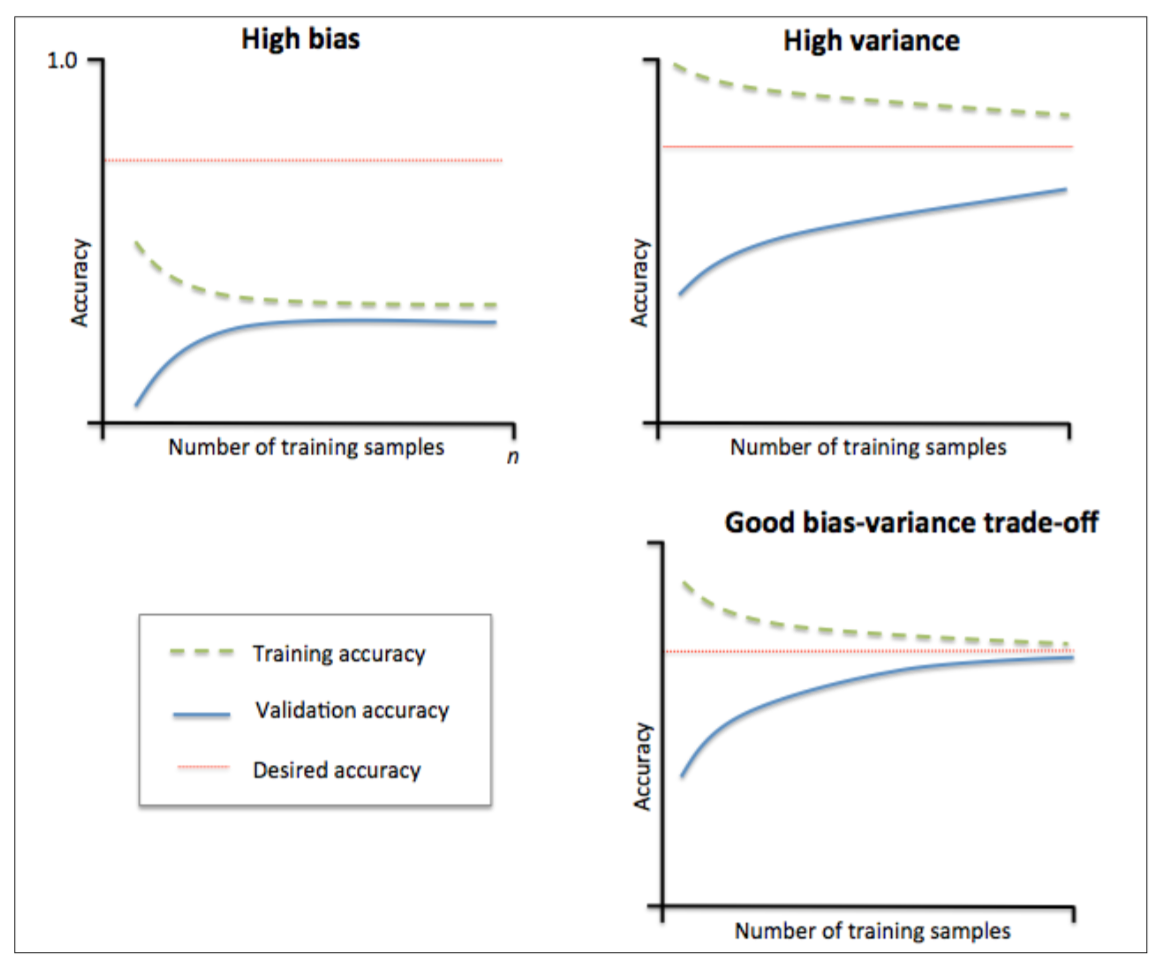

In [2]:
from IPython.display import Image
Image("./fig/bias_variance.png")

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([
        ('scl', StandardScaler()),
        ('clf', LogisticRegression(penalty = 'l2', random_state =0))
    ])

In [52]:
train_sizes, train_scores, test_scores = learning_curve(estimator = pipe_lr, X = X_train, y = y_train,
                                                        train_sizes = np.linspace(0.1, 1.0, 10), cv = 10, n_jobs = 1)

# np.linspace(a, b, c) : a부터 b사이를 c간격으로 나눔

In [53]:
train_sizes

array([ 40,  81, 122, 163, 204, 245, 286, 327, 368, 409])

In [12]:
train_scores

array([[ 1.        ,  0.975     ,  0.975     ,  0.975     ,  0.975     ,
         0.975     ,  0.975     ,  0.975     ,  0.975     ,  0.975     ],
       [ 1.        ,  0.98765432,  0.98765432,  0.98765432,  0.98765432,
         0.98765432,  0.98765432,  0.98765432,  0.98765432,  0.98765432],
       [ 0.99180328,  0.98360656,  0.99180328,  0.99180328,  0.99180328,
         0.99180328,  0.99180328,  0.99180328,  0.99180328,  0.99180328],
       [ 0.99386503,  0.98773006,  0.98773006,  0.99386503,  0.98773006,
         0.98773006,  0.98773006,  0.98773006,  0.98773006,  0.98773006],
       [ 0.99509804,  0.99019608,  0.99019608,  0.99509804,  0.99019608,
         0.99019608,  0.99019608,  0.99019608,  0.99019608,  0.99019608],
       [ 0.99183673,  0.9877551 ,  0.99183673,  0.99183673,  0.99183673,
         0.99183673,  0.99183673,  0.99183673,  0.99183673,  0.99183673],
       [ 0.99300699,  0.99300699,  0.99300699,  0.99300699,  0.99300699,
         0.99300699,  0.99300699,  0.99300699

In [13]:
train_scores.shape

(10, 10)

In [14]:
train_mean = np.mean(train_scores, axis = 1) # 행 평균
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

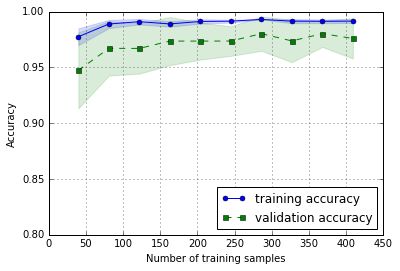

In [15]:
## plotting
%matplotlib inline
# training data
plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

# test data
plt.plot(train_sizes, test_mean, color = 'green', marker = 's', linestyle = '--', 
         markersize = 5, label = 'validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.8, 1.0])
plt.show()

- training 과정중에 sample size가 증가하면서 overfitting 경향을 보임. 

### 3) Addressing overfitting and underfitting with validation curves

- validation curve는 모델의 성능을 향상시켜주는 유용한 도구로 과적합과 미적합을 설명해줌
- sample size에 따른 training and test accuracy를 표현하는 learning curve와 달리 regularization term과 같은 **model parameter의 값을 다양하게 주고 그에 따른 accuracy를 나타냄**


In [16]:
# code
from sklearn.learning_curve import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator = pipe_lr, X = X_train, y = y_train,
                                             param_name = 'clf__C', 
                                             param_range = param_range,
                                             cv = 10, n_jobs = 1)

In [17]:
train_mean = np.mean(train_scores, axis = 1) # 행 평균
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

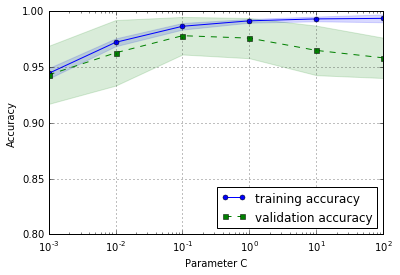

In [18]:
## plotting
%matplotlib inline
# training data
plt.plot(param_range, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

# test data
plt.plot(param_range, test_mean, color = 'green', marker = 's', linestyle = '--', 
         markersize = 5, label = 'validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.8, 1.0])
plt.show()

- regularization strength(C가 작아지면)를 증가시키면 underfitting되는 경향이 있음
- C = 0.1 정도가 적당해보임

## 4. Fine-tuning machine learning models via grid search

ML에서 두가지 타입의 parameter가 존재함
- **training data로 부터 학습되는 파라미터** : regression의 weight 등
- **학습 알고리즘을 최적화 할 때 사용되는 파라미터 (hyperparameter)** : regularization term, depth parameter 등

**grid search**라는 hyperparameter optimization technique을 통해 하이퍼파라미터 값에 대한 최적의 조합을 찾을 수 있음 ---> 모델 성능 향상

### 1) Tuning hyperparameters via grid search

- brute-force exhaustive search paradigm : 가능한 경우를 일일이 탐색하는 방법

In [54]:
## code
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = Pipeline([('scl', StandardScaler()), 
                    ('clf', SVC(random_state = 1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'clf__C' : param_range, 'clf__kernel' : ['linear']},
             {'clf__C' : param_range, 'clf__gamma' : param_range, 'clf__kernel' : ['rbf']}]

gs = GridSearchCV(estimator = pipe_svc, 
                 param_grid = param_grid, 
                 scoring = 'accuracy', 
                 cv = 10, n_jobs = -1)

In [20]:
gs = gs.fit(X_train, y_train)

In [21]:
print(gs.best_score_)

0.978021978021978


In [22]:
print(gs.best_params_)

{'clf__kernel': 'linear', 'clf__C': 0.1}


In [23]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print("Test accuracy: %.3f" % clf.score(X_test, y_test))

Test accuracy: 0.965


### 2) Algorithm selection with nested cross-validation

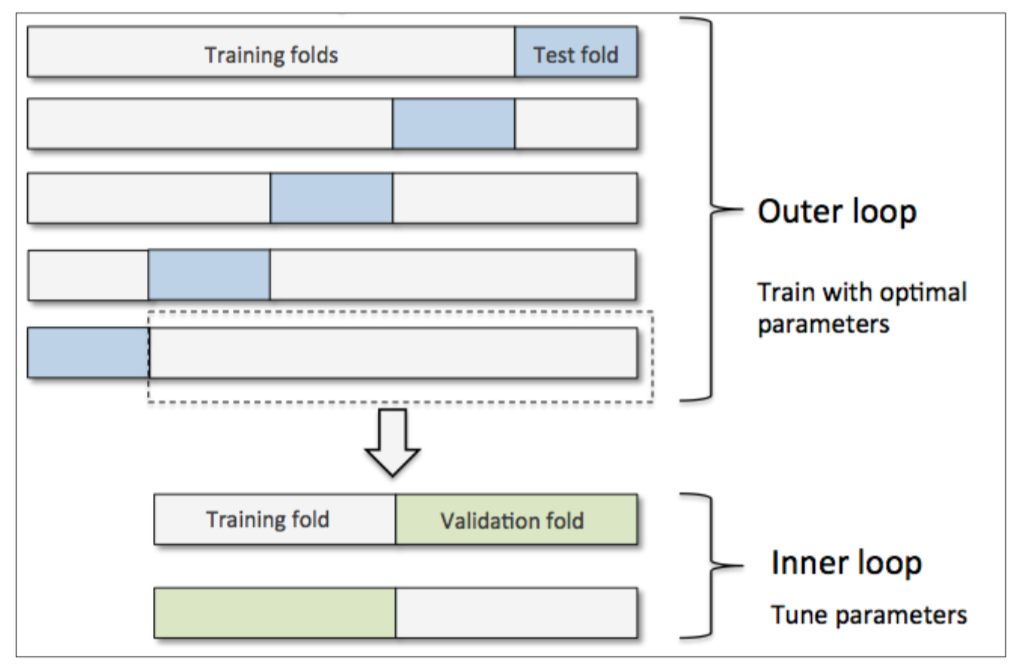

In [3]:
from IPython.display import Image
Image("./fig/nested_cv.png")

In [24]:
## code
from sklearn.model_selection import cross_val_score
gs = GridSearchCV(estimator = pipe_svc, 
                 param_grid = param_grid, 
                 scoring = 'accuracy', 
                 cv = 10, n_jobs = -1)

In [26]:
scores = cross_val_score(gs, X, y, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.972 +/- 0.012


## 5. Looking at different performance evaluation metrics

- performance metrics를 이용한 모델 성능 측정 : precision, recall(재현율), F1-score

### 1) Reading a confusion matrix

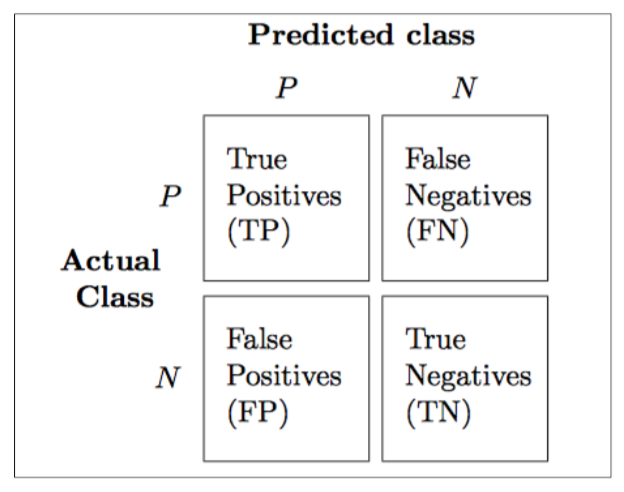

In [4]:
from IPython.display import Image
Image("./fig/confusion_matrix.png")

In [27]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


In [28]:
confmat.shape

(2, 2)

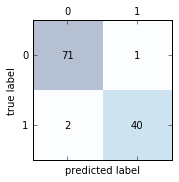

In [30]:
fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x = j, y = i, s = confmat[i, j], va = 'center', ha = 'center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

### 2) Optimizing the precision and recall of a classification model

- **error(ERR)**과 **accuracy(ACC)** 개념을 통해 얼마나 많은 샘플들이 오분류 되었는지 파악함

         ERR = (FP + FN) / Total           ACC = (TP + TN) / Total = 1 - ERR

- **true positive rate(TPR, sensitivity, 민감도)** : 맞는걸 맞았다고 예측한 결과에 대한 비율
- **false positive rate(FPR)** : 틀린걸 맞았다고 예측한 결과에 대한 비율 = 1 - 특이도

         FPR = (FP) / (FP + TN)           TPR = (TP) / (TP + FN)

- **Precision(PRE, 정확도)** : 맞았다고 예측한 것 중 실제 맞은 비율(모델의 성능 기준)
- **Recall(REC, 재현율) = 민감도** : 실제 맞는 것 중 맞았다고 예측한 비율(설명력, 모델의 실제 커버 범위) 

    PRE = (TP) / (TP + FP)

- **F1-score** : PRE와 REC의 combination

    F1 = 2(PRE * REC) / (PRE + REC)

In [32]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
print('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))

Precision: 0.976


In [33]:
print('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))

Recall: 0.952


In [34]:
print('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

F1: 0.964


- 기타 scoring parameter
: http://scikit-learn.org/stable/modules/model_evaluation.html.

### 2) Plotting a receiver operating characteristic (ROC curve)

- TRP과 FPR에 대한 관계를 기반으로 성능 평가 (FPR을 최대한 작게하면서 TPR을 높임)
- area under the curve (AUC)를 통해 성능 평가

또 다른 성능 평가법으로 Precision-recall curve가 있음 : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html.

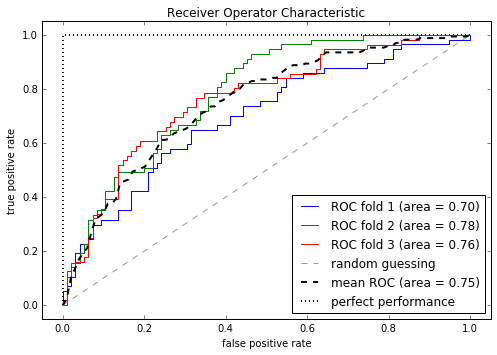

In [60]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
import matplotlib.pyplot as plt
import numpy as np

X_train2 = X_train[:, [4, 14]] # 4열과 14열만 선택
cv = list(StratifiedKFold(n_splits=3, random_state=1).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, threshold = roc_curve(y_train[test],
                                   probas[:, 1],
                                   pos_label = 1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             lw=1,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         lw=2,
         linestyle=':',
         color='black',
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('./figures/roc.png', dpi=300)
plt.show()

In [46]:
pipe_lr = pipe_lr.fit(X_train2, y_train)
y_pred2 = pipe_lr.predict(X_test[:, [4, 14]])

In [47]:
from sklearn.metrics import roc_auc_score, accuracy_score
print('ROC AUC: %.3f' % roc_auc_score(y_true=y_test, y_score=y_pred2))
print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred2))

ROC AUC: 0.662
Accuracy: 0.711


In [56]:
probas.shape

(151, 2)

In [57]:
mean_tpr

array([ 0.        ,  0.02349624,  0.10609858,  0.12364244,  0.17053049,
        0.19392231,  0.21157059,  0.27046784,  0.31766917,  0.33531746,
        0.34711779,  0.37656642,  0.37656642,  0.39995823,  0.4533208 ,
        0.45927318,  0.45927318,  0.482665  ,  0.50052214,  0.50647452,
        0.51232247,  0.54156224,  0.56505848,  0.57685881,  0.61194653,
        0.61194653,  0.61789891,  0.64149958,  0.64149958,  0.64149958,
        0.65329992,  0.6592523 ,  0.68849206,  0.70039683,  0.71209273,
        0.71804511,  0.73558897,  0.73558897,  0.75313283,  0.75313283,
        0.77067669,  0.77652464,  0.79417293,  0.80012531,  0.81766917,
        0.82351713,  0.82351713,  0.82351713,  0.83521303,  0.83521303,
        0.83521303,  0.84106099,  0.84701337,  0.85870927,  0.87040518,
        0.88210109,  0.88805347,  0.88805347,  0.88805347,  0.88805347,
        0.89974937,  0.89974937,  0.90570175,  0.9235589 ,  0.93535923,
        0.93535923,  0.93535923,  0.93535923,  0.93535923,  0.93